# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [1]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [2]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

    A @ e_1, A @ e_2, A @ e_3 each return one column of A. Matrix multiplication Ax = sum_j (column_j * x_j), so when x is a basis vector e_i only column i contributes — you pick out column i.

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [3]:
u = np.ones(3)

    A @ u (with u = [1,1,1]) returns the vector of row sums. Each entry is the dot product of a row of A with u, meaning the sum of that row's elements.

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [4]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


        Multiplying an identity matrix by any vector x returns x unchanged. Each row of the identity matrix has a single 1 in the diagonal position and zeros somewhere else, so the dot product picks the corresponding component of x.


d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [5]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])


        A matrix whose rows and columns sum to 1 but is not the identity redistributes components of x.


e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [6]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


        For a Markov transition matrix with column sums 1, A @ e_i equals column i of A, which is the distribution over next states given current state i. Repeatedly applying A to an initial distribution forecasts distributions of later states. Starting from any base vector, you get the distribution after one step. Iterating shows convergence toward the chain's stationary distribution which removes sensitivity to initial state.


f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [35]:
basis_vectors = [("e1", e_1), ("e2", e_2), ("e3", e_3)]
rows = []

for name, e in basis_vectors:
    v = e.copy()
    for k in range(1, 6):  # multiply 5 times
        v = A @ v
        rows.append({
            "vector": name,
            "step": k,
            "result": np.round(v, 4)
        })

result_df = pd.DataFrame(rows)
print(result_df)

   vector  step                    result
0      e1     1  [0.5005, 0.0257, 0.4737]
1      e1     2  [0.3437, 0.2026, 0.4537]
2      e1     3   [0.304, 0.2604, 0.4356]
3      e1     4  [0.2948, 0.2751, 0.4301]
4      e1     5  [0.2927, 0.2786, 0.4287]
5      e2     1   [0.2405, 0.3925, 0.367]
6      e2     2  [0.2821, 0.2994, 0.4185]
7      e2     3    [0.29, 0.2834, 0.4265]
8      e2     4   [0.2916, 0.2804, 0.428]
9      e2     5   [0.292, 0.2798, 0.4282]
10     e3     1  [0.1836, 0.3791, 0.4373]
11     e3     2  [0.2633, 0.3193, 0.4174]
12     e3     3  [0.2852, 0.2903, 0.4245]
13     e3     4  [0.2905, 0.2822, 0.4273]
14     e3     5  [0.2917, 0.2802, 0.4281]


    Repeated multiplication by A causes the resulting vector to gradually approach the same direction, regardless of the initial basis vector. After several iterations, the vectors tend to stabilize toward a single steady-state pattern

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [7]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

T

array([[0.25, 0.5 ],
       [0.75, 0.5 ]])

In [8]:
init_condition = np.array([1,0])  # Start in state 0

In [12]:
p_1 = T @ init_condition
p_1

array([0.25, 0.75])

        This is the distribution of the state one step ahead given you start in state 1.


In [13]:
p_2 = T @ p_1
p_2

array([0.4375, 0.5625])

    This is the two-step forecast (not simply a column of T): it gives the distribution after two transitions

In [14]:
p_3 = T @ p_2
p_3

array([0.390625, 0.609375])

        Repeated application moves the vector toward the stationary distribution. Here the stationary solution satisfies v = T v, which solves to v = [0.4, 0.6]. Convergence is quick since it only requires a couple multiplications to converge.


In [21]:
n=1000
state=0
sim=[]
for i in range(n):
    sim.append(state)
    prob = T[:,state]
    state = np.random.choice([0,1],p=prob)
sim

[0,
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 n

In [22]:
x = np.array(sim)
np.mean(x)

np.float64(0.612)

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("cville_weather.csv")
df["DATE"] = pd.to_datetime(df["DATE"])
df = df.sort_values("DATE").reset_index(drop=True)

print("Date range:", df["DATE"].min(), "to", df["DATE"].max())
print("Missing values per column:\n", df.isna().sum())

Date range: 2024-01-04 00:00:00 to 2025-09-28 00:00:00
Missing values per column:
 STATION              0
NAME                 0
DATE                 0
DAPR               399
DAPR_ATTRIBUTES    399
MDPR               399
MDPR_ATTRIBUTES    399
PRCP                12
PRCP_ATTRIBUTES     12
SNOW               188
SNOW_ATTRIBUTES    188
SNWD               410
SNWD_ATTRIBUTES    410
dtype: int64


In [39]:
df["rain"] = (df["PRCP"] > 0).astype(int)
print("\nRain indicator value counts:\n", df["rain"].value_counts())

states = [0, 1]
tr_counts = np.zeros((2, 2))   # rows: next state, cols: previous state

rain_series = df["rain"].values
for t in range(1, len(rain_series)):
    prev_state = rain_series[t-1]
    curr_state = rain_series[t]
    tr_counts[curr_state, prev_state] += 1

print("\nTransition counts matrix:\n", tr_counts)

# Normalize columns → probabilities P[next | previous]
col_sums = tr_counts.sum(axis=0, keepdims=True)
P = np.divide(tr_counts, col_sums,
              out=np.zeros_like(tr_counts),
              where=col_sums != 0)

P_df = pd.DataFrame(P, index=["Next: clear (0)", "Next: rain (1)"],
                       columns=["Prev: clear (0)", "Prev: rain (1)"])
print("\nTransition probability matrix:\n")
display(P_df.style.format("{:.3f}"))


Rain indicator value counts:
 rain
0    232
1    179
Name: count, dtype: int64

Transition counts matrix:
 [[177.  55.]
 [ 55. 123.]]

Transition probability matrix:



,Prev: clear (0),Prev: rain (1)
Next: clear (0),0.763,0.309
Next: rain (1),0.237,0.691


In [ ]:
p_rain_given_clear = P[1, 0]
p_rain_given_rain  = P[1, 1]

print(f"Pr(rain today | clear yesterday) = {p_rain_given_clear:.3f}")
print(f"Pr(rain today | rainy yesterday) = {p_rain_given_rain:.3f}")

v_clear = np.array([1, 0])  # start clear
v_rainy = np.array([0, 1])  # start rainy

tol = 1e-10
max_iter = 1000

def forecast_until_convergence(v0, P, tol=1e-10, max_iter=1000):
    v = v0.copy()
    history = [v]
    for t in range(max_iter):
        v_next = P @ v
        history.append(v_next)
        if np.linalg.norm(v_next - v, 1) < tol:
            break
        v = v_next
    return np.array(history)

hist_clear = forecast_until_convergence(v_clear, P, tol, max_iter)
hist_rainy = forecast_until_convergence(v_rainy, P, tol, max_iter)

# Convert to DataFrame for visualization
forecast_df = pd.DataFrame({
    "step": np.arange(hist_clear.shape[0]),
    "rain_prob_from_clear": hist_clear[:, 1],
    "rain_prob_from_rainy": hist_rainy[:, 1]
})

Pr(rain today | clear yesterday) = 0.237
Pr(rain today | rainy yesterday) = 0.691


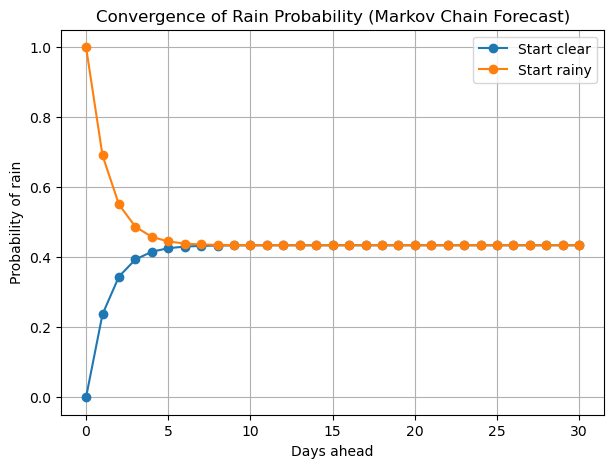


Stationary distribution (clear, rain): [0.5659 0.4341]


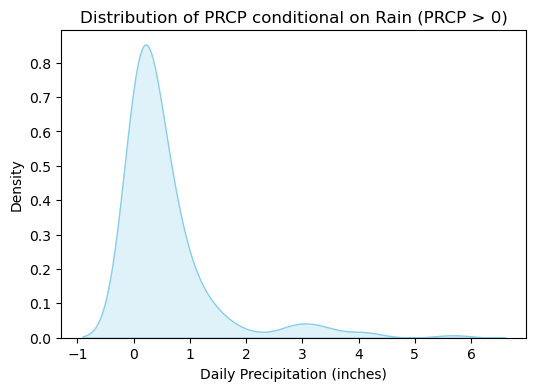

In [42]:
plt.figure(figsize=(7,5))
plt.plot(forecast_df["step"], forecast_df["rain_prob_from_clear"], marker="o", label="Start clear")
plt.plot(forecast_df["step"], forecast_df["rain_prob_from_rainy"], marker="o", label="Start rainy")
plt.xlabel("Days ahead")
plt.ylabel("Probability of rain")
plt.title("Convergence of Rain Probability (Markov Chain Forecast)")
plt.legend()
plt.grid(True)
plt.show()

# Stationary distribution (long-run)
eigvals, eigvecs = np.linalg.eig(P)
v_star = eigvecs[:, np.isclose(eigvals, 1)]
v_star = v_star[:,0] / v_star[:,0].sum()
print("\nStationary distribution (clear, rain):", np.round(v_star.real, 4))

plt.figure(figsize=(6,4))
sns.kdeplot(df.loc[df["rain"]==1, "PRCP"], fill=True, color="skyblue")
plt.xlabel("Daily Precipitation (inches)")
plt.ylabel("Density")
plt.title("Distribution of PRCP conditional on Rain (PRCP > 0)")
plt.show()



    Interpretation:
    - It rains with probability 0.691 if it rained yesterday,
    and with probability 0.237 if it was clear yesterday.
    - Forecasts from clear and rainy starts converge to the same stationary probability of rain,
    approximately 0.434, meaning that after several days, the weather does not act based on previous days' weather.
    - Conditional precipitation shows most rain amounts are small, with a right-skewed tail for heavy storms.

    Model improvement idea:
    - Instead of a simple two-state chain, use a three-state model (clear, light rain, heavy rain)
    or include seasonality by estimating separate transition matrices by month or season.

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

1000
Transition Counts:
 [[2.373110e+05 1.719700e+04 1.787400e+04 ... 1.554500e+04 1.000000e+00
  7.774300e+04]
 [1.789600e+04 3.463220e+05 9.702000e+03 ... 1.262600e+04 0.000000e+00
  4.640200e+04]
 [1.468800e+04 1.104800e+04 1.361470e+05 ... 4.636000e+03 1.000000e+00
  3.911600e+04]
 ...
 [1.567400e+04 1.249300e+04 3.892000e+03 ... 6.257200e+04 0.000000e+00
  1.201100e+04]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 1.000000e+00 2.000000e+00
  2.000000e+00]
 [7.178700e+04 6.471200e+04 3.468400e+04 ... 1.875400e+04 4.000000e+00
  1.203902e+06]]
State Counts:
 [[8.886440e+05]
 [1.224325e+06]
 [4.415950e+05]
 [1.058730e+05]
 [1.063770e+05]
 [7.253000e+04]
 [8.393620e+05]
 [1.112860e+05]
 [8.010000e+03]
 [5.077760e+05]
 [2.797713e+06]
 [1.743220e+05]
 [2.171620e+05]
 [3.000000e+00]
 [4.086400e+05]
 [2.292330e+05]
 [3.603000e+03]
 [1.627050e+05]
 [1.978283e+06]
 [8.740550e+05]
 [1.038800e+04]
 [3.705660e+05]
 [3.851929e+06]
 [6.543970e+05]
 [5.102620e+05]
 [3.859100e+04]
 [3.168490e+05]


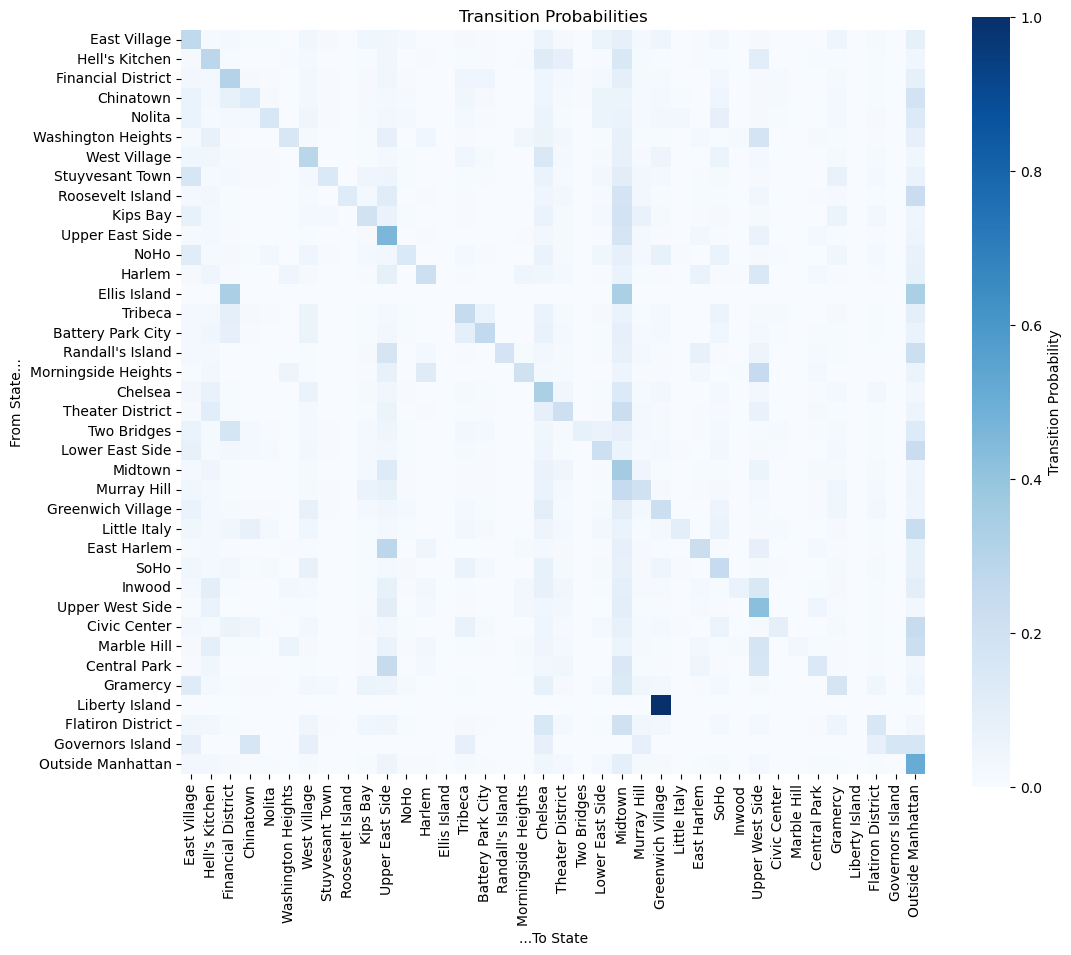

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

with open('taxicab.pkl','rb') as f:
    data = pickle.load(f)

print(len(data))
data[0]

## Extract state space:
states = set(data[0])
for i in range(1,len(data)):
    trip_i = set(data[i])
    states = states.union(trip_i)

states = list(states)


S = len(states)
tr_counts = np.zeros((S,S))

## Compute transition counts:
for trip in data:
    seq = np.array(trip)
    for t in range(1,len(seq)):
        # Current and next tokens:
        x_tm1 = seq[t-1] # previous state
        x_t = seq[t] # current state
        # Determine transition indices:
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        # Update transition counts:
        tr_counts[index_to, index_from] += 1

print('Transition Counts:\n', tr_counts)

# Sum the transition counts by row:
sums = tr_counts.sum(axis=1, keepdims=True)
print('State Counts:\n', sums)
print(sums)

# Normalize the transition count matrix to get proportions:
tr_pr = np.divide(tr_counts, sums, 
                             out=np.zeros_like(tr_counts), 
                             where=sums!=0)

print('Transition Proportions:\n')

tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)
print(tr_df)

plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# %%

## Taxicabs are more liekly order 1 because they tend to stay in the same area
## for multiple consecutive trips rather than moving around the city randomly. Additionally
## they do not make future decisions based on past trips, only the current location.



In [ ]:
start_state = "Hell's Kitchen"
if start_state not in states:
    raise ValueError(f"{start_state} not found in states list.")

# One-hot starting vector
v0 = np.zeros(S)
v0[states.index(start_state)] = 1

steps = [2, 3, 5, 10]
forecast_rows = []

for n in steps:
    # Compute P^n using matrix multiplication
    Pn = np.linalg.matrix_power(tr_pr, n)
    vn = v0 @ Pn  # Probability distribution after n trips

    # Sort and store top neighborhoods
    order = np.argsort(-vn)
    for rank, i in enumerate(order[:10], start=1):
        forecast_rows.append({
            "steps": n,
            "rank": rank,
            "neighborhood": states[i],
            "probability": vn[i]
        })

forecast_df = pd.DataFrame(forecast_rows)
display(forecast_df.style.format({"probability": "{:.4f}"}).set_caption("Forecasts from Hell's Kitchen"))


,steps,rank,neighborhood,probability
0,2,1,Midtown,0.1747
1,2,2,Hell's Kitchen,0.1192
2,2,3,Chelsea,0.1102
3,2,4,Upper West Side,0.1090
4,2,5,Upper East Side,0.0843
5,2,6,Outside Manhattan,0.0634
6,2,7,Theater District,0.0622
7,2,8,West Village,0.0340
8,2,9,East Village,0.0256
9,2,10,Murray Hill,0.0240


In [31]:
tol = 1e-12
max_iter = 1_000_000

v = np.ones(S) / S  # uniform start
t = 0
while t < max_iter:
    v_next = v @ tr_pr
    if np.linalg.norm(v_next - v, 1) < tol:
        break
    v = v_next
    t += 1

print(f"Converged in {t+1} iterations (L1 tolerance {tol}).")

# Sort and show top 15 neighborhoods
order = np.argsort(-v_next)
stationary_rows = []
for rank, i in enumerate(order[:15], start=1):
    stationary_rows.append({
        "rank": rank,
        "neighborhood": states[i],
        "probability": v_next[i]
    })

stationary_df = pd.DataFrame(stationary_rows)
display(stationary_df.style.format({"probability": "{:.4f}"}).set_caption("Stationary Distribution (Top 15)"))

# Identify where cabs spend the most time
top_idx = order[0]
print(f"➡️ Cabs spend the most time in: {states[top_idx]} (prob ≈ {v_next[top_idx]:.4f})")


Converged in 50 iterations (L1 tolerance 1e-12).


,rank,neighborhood,probability
0,1,Midtown,0.1678
1,2,Upper East Side,0.1218
2,3,Outside Manhattan,0.1029
3,4,Chelsea,0.0862
4,5,Upper West Side,0.0785
5,6,Hell's Kitchen,0.0533
6,7,East Village,0.0387
7,8,Theater District,0.0381
8,9,West Village,0.0366
9,10,Murray Hill,0.0285


➡️ Cabs spend the most time in: Midtown (prob ≈ 0.1678)


    Taxicabs are more liekly order 1 because they tend to stay in the same area for multiple consecutive trips rather than moving around the city randomly. Additionally they do not make future decisions based on past trips, only the current location.